In [1]:
#Creating the setup 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import re 
import seaborn as sns
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer


#Downloading the required NLTK data 
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [2]:
#DATA LOADING 
df = pd.read_csv('../data/raw_news_data.csv')
print(f"Original dataset shape: {df.shape}")
print(f"\nMissing values:")
print(df.isnull().sum())
df.head()

Original dataset shape: (900, 9)

Missing values:
title           0
description     5
content         1
full_text       0
url             0
source          0
published_at    0
topic           0
collected_at    0
dtype: int64


,title,description,content,full_text,url,source,published_at,topic,collected_at
0,"WIRED Roundup: Fandom in Politics, Zuckerberg’...","In this episode of “Uncanny Valley,” we run th...","Leah Feiger: Zoë, I am obsessed with this stor...","WIRED Roundup: Fandom in Politics, Zuckerberg’...",https://www.wired.com/story/uncanny-valley-pod...,Wired,2025-11-17T22:11:19Z,politics,2025-12-05T18:55:16.748397
1,The feud between Ben Shapiro and Nick Fuentes ...,"Typically, the long-running MAGA influencer fe...",<ul><li></li><li></li></ul>\r\nAfter Tucker Ca...,The feud between Ben Shapiro and Nick Fuentes ...,https://www.theverge.com/policy/814932/shapiro...,The Verge,2025-11-05T23:12:08Z,politics,2025-12-05T18:55:16.748425
2,Nancy Pelosi announces retirement after decade...,Pelosi made history as the first female Speake...,Nancy Pelosi has announced her retirement from...,Nancy Pelosi announces retirement after decade...,https://www.bbc.com/news/articles/ce3xw3dw0zxo,BBC News,2025-11-06T14:14:51Z,politics,2025-12-05T18:55:16.748433
3,How X's new location feature exposed big US po...,Dozens of pro-Trump accounts are being accused...,"Shayan Sardarizadeh, Thomas Copeland and Tom E...",How X's new location feature exposed big US po...,https://www.bbc.com/news/articles/cj38m11218xo,BBC News,2025-11-24T22:21:37Z,politics,2025-12-05T18:55:16.748437
4,Emails highlight Jeffrey Epstein and Steve Ban...,New documents show the pair discussing travel ...,"In November 2018, Steve Bannon, formerly Donal...",Emails highlight Jeffrey Epstein and Steve Ban...,https://www.bbc.com/news/articles/ckgy81jlxqgo,BBC News,2025-11-14T22:39:09Z,politics,2025-12-05T18:55:16.748442


In [3]:
#NOW CREATING THE TEXT PREPROCESSING 

class TextPreprocessor: 
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.keep_words = {
             'not', 'no', 'never', 'neither', 'nobody', 'nothing',
            'very', 'too', 'most', 'more', 'less', 'few', 'much',
            'many', 'really', 'quite', 'rather', 'fairly'
        }
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        #Now performign the following for cleaning the words
        #1. Removing URL, HTML and special characters 
        if pd.isna(text) or text == '':
            return " "
        
        #2. Converting it to string 
        text = str(text)

        #3. Lowercasing everything 
        text = text.lower()

        #4. Removing the URL
        text =re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        #5. Removing the tags 
        text = re.sub(r'<.*?>', '', text)

        #6. Removing email addresses 
        text = re.sub(r'\S+@\S+', '', text)

        #7. rmeoving special characters
        text = re.sub(r'[^a-zA-Z\s!?.,]', '', text)

        #8. Removing whitespace 
        text = re.sub(r'\s+', ' ', text).strip()

        return text 
    
    #TOKENIZATION 
    def tokenize(self, text):
     return word_tokenize(text)

#REMOVING STOPWORDS 
    def remove_stopwords(self, tokens):
     return [word for word in tokens if word not in self.stop_words or word in self.keep_words]

#LEMMATIZATION
    def lemmatize(self, tokens):
     return [self.lemmatizer.lemmatize(word) for word in tokens]

#PREPROCESSING 
    def preprocess(self, text, remove_stops=True, lemmatize_text=True, tokenize_text=True):
    #Now cleaning the enitre by calligng those functions 

     text = self.clean_text(text)
     tokens = self.tokenize(text)
     if remove_stops:
        tokens = self.remove_stopwords(tokens)

     if lemmatize_text:
        tokens = self.lemmatize(tokens)

     return tokens 

#Initializing the preprocessor
preprocessor = TextPreprocessor()
print("Preprocessor initialized")



Preprocessor initialized


In [4]:
#FIXING MISSING VALUES
print("Before handling missing values:")
print(df.isnull().sum())

# Fill missing content with title + description
df['content'] = df['content'].fillna('')
df['description'] = df['description'].fillna('')
df['title'] = df['title'].fillna('')

# Create full_text column if it doesn't exist
if 'full_text' not in df.columns:
    df['full_text'] = df['title'] + ' ' + df['description'] + ' ' + df['content']

# Fill any remaining missing values in full_text
df['full_text'] = df['full_text'].fillna('')

# Remove rows with empty full_text
df = df[df['full_text'].str.strip() != '']

print(f"\nAfter handling missing values:")
print(df.isnull().sum())
print(f"\nNew shape: {df.shape}")

Before handling missing values:
title           0
description     5
content         1
full_text       0
url             0
source          0
published_at    0
topic           0
collected_at    0
dtype: int64

After handling missing values:
title           0
description     0
content         0
full_text       0
url             0
source          0
published_at    0
topic           0
collected_at    0
dtype: int64

New shape: (900, 9)


In [5]:
#FIXING DUPLICATES 
#FIRST CHECKING REUDUNDACY 
print(f"Duplicates based on URL: {df.duplicated(subset=['url']).sum()}")
print(f"Duplicates based on title: {df.duplicated(subset=['title']).sum()}")

#Printing duplicacy percentage 
duplicacy_percentage_url = (df.duplicated(subset=['url']).sum() / len(df)) * 100
print(f"Duplicacy percentage based on URL: {duplicacy_percentage_url}%")
duplicacy_percentage_title = (df.duplicated(subset=['title']).sum() / len(df)) * 100
print(f"Duplicacy percentage based on title: {duplicacy_percentage_title}%")

# Remove duplicates
df = df.drop_duplicates(subset=['url'], keep='first')

print(f"\nAfter removing duplicates: {len(df)} articles")

Duplicates based on URL: 57
Duplicates based on title: 62
Duplicacy percentage based on URL: 6.333333333333334%
Duplicacy percentage based on title: 6.888888888888889%

After removing duplicates: 843 articles


In [6]:
#APPLYING TEXT CLEANING 
from tqdm import tqdm 
tqdm.pandas()

print("Cleaning text...")
df['cleaned_text'] = df['full_text'].progress_apply(preprocessor.clean_text)

# Show examples
print("\nExample of cleaning:")
print("="*80)
for i in range(3):
    print(f"\nOriginal (article {i}):")
    print(df['full_text'].iloc[i][:200] + "...")
    print(f"\nCleaned:")
    print(df['cleaned_text'].iloc[i][:200] + "...")
    print("="*80)


Cleaning text...

100%|██████████| 843/843 [00:00<00:00, 4203.46it/s]


Example of cleaning:

Original (article 0):
WIRED Roundup: Fandom in Politics, Zuckerberg’s Illegal School, and Nepal’s Discord Revolution In this episode of “Uncanny Valley,” we run through the top stories of the week and examine how some of t...

Cleaned:
wired roundup fandom in politics, zuckerbergs illegal school, and nepals discord revolution in this episode of uncanny valley, we run through the top stories of the week and examine how some of the vi...

Original (article 1):
The feud between Ben Shapiro and Nick Fuentes is now mainstream GOP politics Typically, the long-running MAGA influencer feud between white supremacist streamer Nick Fuentes and Jewish conservative po...

Cleaned:
the feud between ben shapiro and nick fuentes is now mainstream gop politics typically, the longrunning maga influencer feud between white supremacist streamer nick fuentes and jewish conservative pod...

Original (article 2):
Nancy Pelosi announces retirement after decades in US Congress Pelosi mad

In [7]:
#TOEKNIZATION 
preprocessor = TextPreprocessor()
#Printing attributes of text preprocessor

print("Tokenizing text...")
df['tokens'] = df['cleaned_text'].progress_apply(preprocessor.tokenize)

# Token count
df['token_count'] = df['tokens'].apply(len)

print(f"\nToken statistics:")
print(df['token_count'].describe())

# Remove very short articles (less than 50 tokens)
print(f"\nArticles with < 50 tokens: {(df['token_count'] < 50).sum()}")
df = df[df['token_count'] >= 50]
print(f"After filtering: {len(df)} articles")

Tokenizing text...


100%|██████████| 843/843 [00:00<00:00, 1055.38it/s]


Token statistics:
count    843.000000
mean      73.169632
std       11.828382
min       31.000000
25%       64.000000
50%       72.000000
75%       81.000000
max      111.000000
Name: token_count, dtype: float64

Articles with < 50 tokens: 9
After filtering: 834 articles


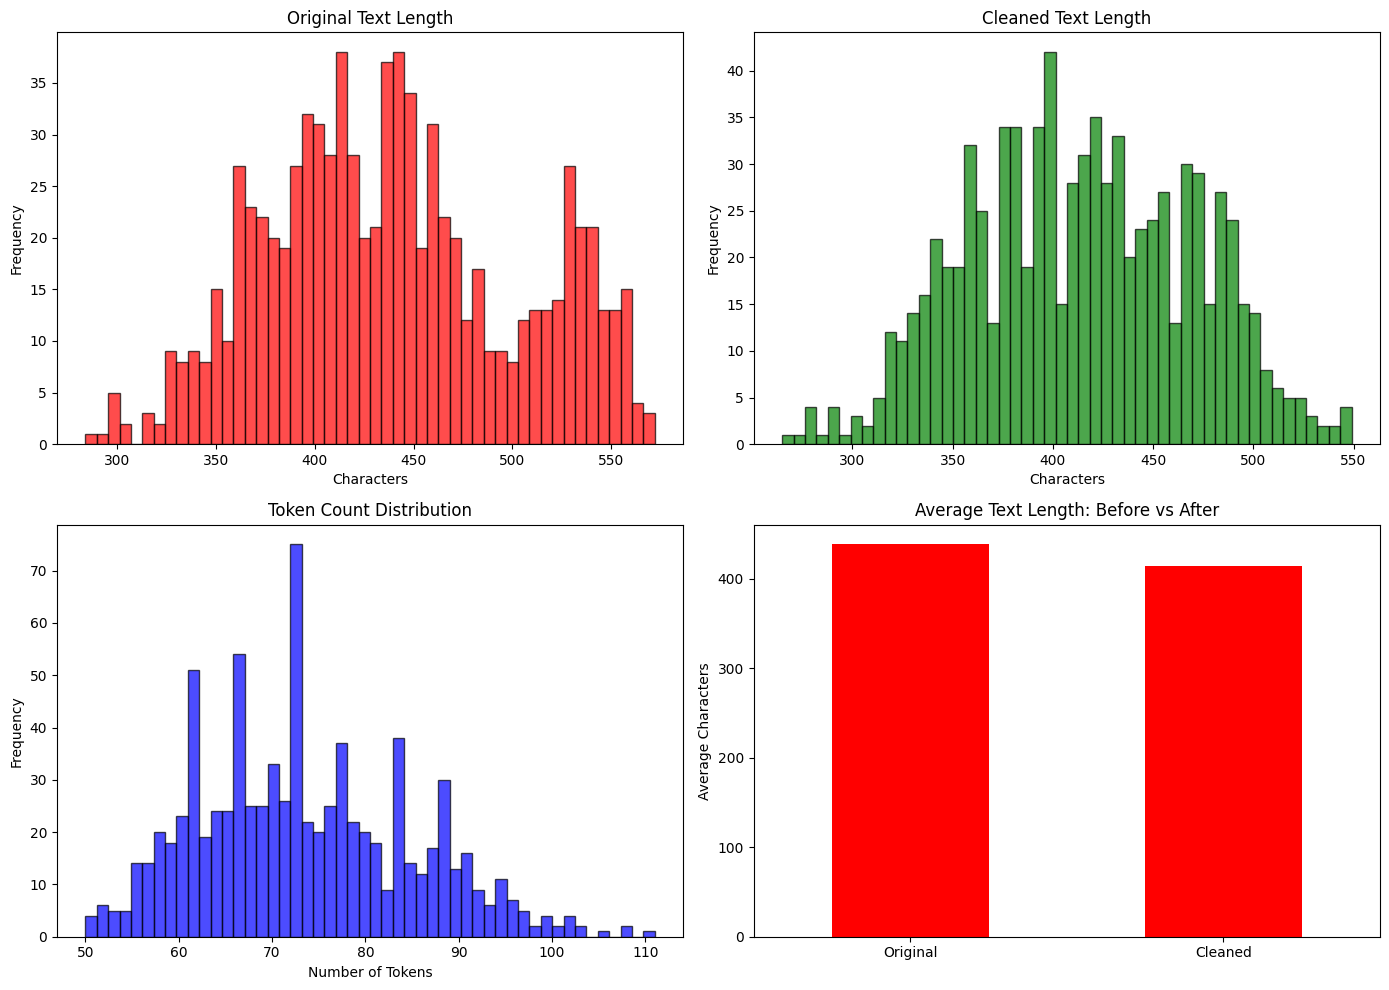

In [8]:
#DATA VISUALIZATION AFTER PRE-RPCOESSING 

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original text length
axes[0, 0].hist(df['full_text'].str.len(), bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Original Text Length')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].set_ylabel('Frequency')

# Cleaned text length
axes[0, 1].hist(df['cleaned_text'].str.len(), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Cleaned Text Length')
axes[0, 1].set_xlabel('Characters')
axes[0, 1].set_ylabel('Frequency')

# Token count distribution
axes[1, 0].hist(df['token_count'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Token Count Distribution')
axes[1, 0].set_xlabel('Number of Tokens')
axes[1, 0].set_ylabel('Frequency')

# Before vs After comparison
comparison = pd.DataFrame({
    'Original': [df['full_text'].str.len().mean()],
    'Cleaned': [df['cleaned_text'].str.len().mean()]
})
comparison.T.plot(kind='bar', ax=axes[1, 1], legend=False, color=['red', 'green'])
axes[1, 1].set_title('Average Text Length: Before vs After')
axes[1, 1].set_ylabel('Average Characters')
axes[1, 1].set_xticklabels(['Original', 'Cleaned'], rotation=0)

plt.tight_layout()
plt.savefig('../visualizations/cleaning_impact.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
#TAKING CLEANED DATA AND SAVING IT 
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# Save
df.to_csv('../data/cleaned_news_data.csv', index=False)
print(f"✓ Cleaned data saved to: data/cleaned_news_data.csv")

# Summary
print("\n" + "="*50)
print("DATA CLEANING SUMMARY")
print("="*50)
print(f"Original articles: {len(df)}")
print(f"Average tokens per article: {df['token_count'].mean():.0f}")
print(f"Min tokens: {df['token_count'].min()}")
print(f"Max tokens: {df['token_count'].max()}")
print(f"Articles by topic:")
print(df['topic'].value_counts())


✓ Cleaned data saved to: data/cleaned_news_data.csv

DATA CLEANING SUMMARY
Original articles: 834
Average tokens per article: 73
Min tokens: 50
Max tokens: 111
Articles by topic:
topic
politics         99
sports           98
health           95
economy          94
technology       93
crime            93
climate          91
entertainment    88
education        83
Name: count, dtype: int64
